# **Importing the required libraries and packages for Nueral networks and Convolutional nueral networks.**

In [38]:
#@title
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras   

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

1.14.0


# Downloading the datasets from the library and transforming them 

(60000, 28, 28)
(10000, 28, 28)


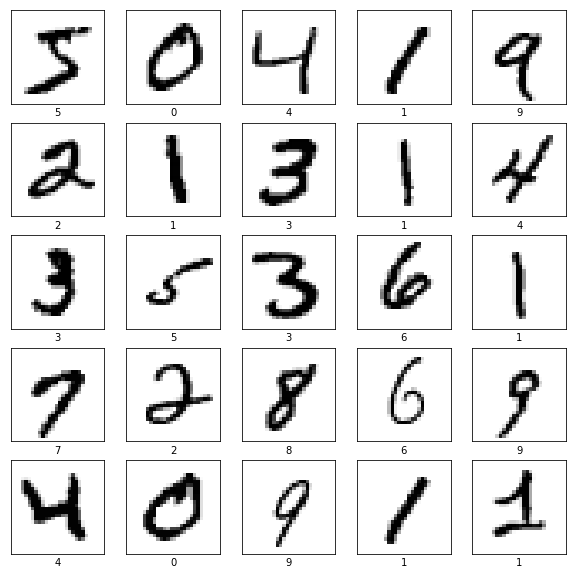

In [39]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
len(train_labels)
print(test_images.shape)
len(test_labels)

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names=['0','1','2','3','4','5','6','7','8','9']

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# **Defining the model for classification**

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(200, activation=tf.nn.relu), # hidden layer
    keras.layers.Dense(50, activation=tf.nn.relu), # hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # output classification layer
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


# **Different types of optimization and fitting the model**

In [41]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels,validation_split=0.2, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 108us/sample - loss: 0.6919 - acc: 0.8161 - val_loss: 0.3322 - val_acc: 0.9069
Epoch 2/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3135 - acc: 0.9116 - val_loss: 0.2672 - val_acc: 0.9239
Epoch 3/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.2588 - acc: 0.9268 - val_loss: 0.2311 - val_acc: 0.9334
Epoch 4/5
48000/48000 [==============================] - 5s 104us/sample - loss: 0.2248 - acc: 0.9358 - val_loss: 0.2045 - val_acc: 0.9429
Epoch 5/5
10000/10000 [==============================] - 1s 62us/sample - loss: 0.1870 - acc: 0.9448
Test accuracy: 0.9448
7
7


# Exercise 


1) Modify the network architecture to Insert one more hidden layer with 50 nodes before classification layer. Observe the Model Summary 


2) Use different optimizers "RMSProp, AdaGrad and Adam" and note down the loss, acc, val_loss, val_acc values after 5 epochs.

3) Increase number of epochs to 30  and note down the loss, acc, val_loss, val_acc after training the model .

4) Verify the results of classification  for a randomly choosen Image.

# ****Simple CNN****

# **Importing the required libraries and packages**

In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
print(tf.__version__)

1.14.0


# **Loading the train and test dataset and transforming it and display them**

(60000, 28, 28)
60000
(10000, 28, 28)
10000


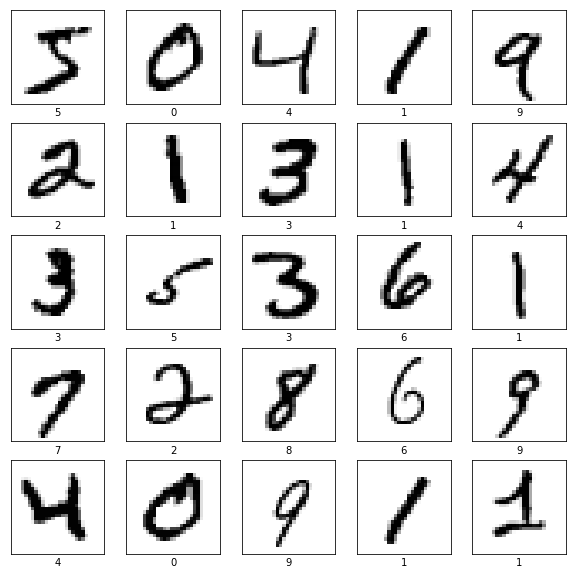

In [43]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names=['0','1','2','3','4','5','6','7','8','9']
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images =train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# **Defining the model 

In [44]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               135300    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________


# Optimizing the network and fitting the model

In [0]:
def show_plots(history, plot_title=None, fig_size=None):
    """ Useful function to view plot of loss values & accuracies across the various epochs
        Works with the history object returned by the train_model(...) call """
    assert type(history) is dict

    # NOTE: the history object should always have loss & acc (for training data), but MAY have
    # val_loss & val_acc for validation data
    loss_vals = history['loss']
    val_loss_vals = history['val_loss'] if 'val_loss' in history.keys() else None
    epochs = range(1, len(history['acc']) + 1)

    f, ax = plt.subplots(nrows=1, ncols=2, figsize=((16, 4) if fig_size is None else fig_size))

    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy', marker='o', linestyle=' ', label='Training Loss')
    if val_loss_vals is not None:
        ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
        ax[0].set_title('Training & Validation Loss')
        ax[0].legend(loc='best')
    else:
        ax[0].set_title('Training Loss')

    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc'] if 'val_acc' in history.keys() else None

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    if val_acc_vals is not None:
        ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
        ax[1].set_title('Training & Validation Accuracy')
        ax[1].legend(loc='best')
    else:
        ax[1].set_title('Training Accuracy')

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    if plot_title is not None:
        plt.suptitle(plot_title)

    plt.show()
    plt.close()

    # delete locals from heap before exiting (to save some memory!)
    del loss_vals, epochs, acc_vals
    if val_loss_vals is not None:
        del val_loss_vals
    if val_acc_vals is not None:
        del val_acc_vals


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 192us/step - loss: 0.2113 - acc: 0.9368 - val_loss: 0.1272 - val_acc: 0.9590
Epoch 2/5
48000/48000 [==============================] - 9s 179us/step - loss: 0.0784 - acc: 0.9756 - val_loss: 0.0760 - val_acc: 0.9778
Epoch 3/5
48000/48000 [==============================] - 9s 181us/step - loss: 0.0517 - acc: 0.9836 - val_loss: 0.0676 - val_acc: 0.9817
Epoch 4/5
48000/48000 [==============================] - 9s 185us/step - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0610 - val_acc: 0.9815
Epoch 5/5
48000/48000 [==============================] - 9s 178us/step - loss: 0.0259 - acc: 0.9922 - val_loss: 0.0662 - val_acc: 0.9808


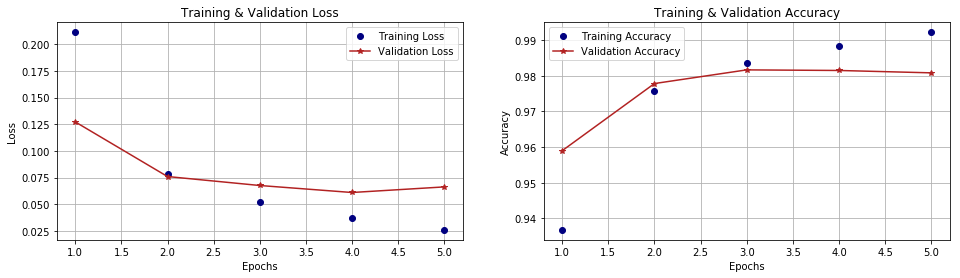

10000/10000 [==============================] - 1s 74us/step
Test accuracy: 0.9819
7
7


In [46]:


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
perform=model.fit(train_images, train_labels,validation_split=0.2, epochs=5)
show_plots(perform.history)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])

# **Plotting the loss and accuracy curves**

# **Exercise**

1.   Change the kernel size to 5x5 and observe the model summery.
2.   Increse the no.of kernels in the first layer to 64 and re run the model. Observe loss, acc, val_loss, val_acc.
3.   Increse the no.of epochs for training and observe the plots.
4.   Change the initialisation of the kernel to other popular method.
5.  check the network with different types of the optimizers.(Adm,ada-boost)












# **CNN for Cifar-10 dataset classification**

# **Importing the required libraries and packages**

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import matplotlib.pyplot as plt
import os

# **Configuring the model parameters**

In [0]:
batch_size = 32
num_classes = 10
epochs = 2
data_augmentation = True
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'


# **Splitting the dataset and and converting class vectors to binary class matrices**

In [49]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# **Defining the model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# **Optimizing the network (RMSprop)**

In [51]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

perform=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)


Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 19s 463us/step - loss: 1.9005 - acc: 0.3097 - val_loss: 1.6297 - val_acc: 0.4260
Epoch 2/2
40000/40000 [==============================] - 17s 433us/step - loss: 1.5734 - acc: 0.4329 - val_loss: 1.4575 - val_acc: 0.4850


# **Loss and accuracy curves**

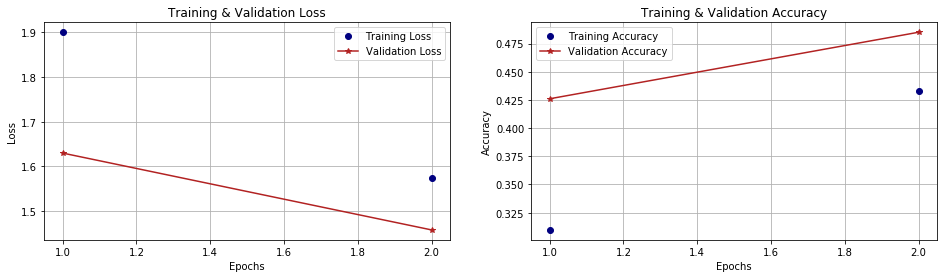

In [52]:
def show_plots(history, plot_title=None, fig_size=None):
    """ Useful function to view plot of loss values & accuracies across the various epochs
        Works with the history object returned by the train_model(...) call """
    assert type(history) is dict

    # NOTE: the history object should always have loss & acc (for training data), but MAY have
    # val_loss & val_acc for validation data
    loss_vals = history['loss']
    val_loss_vals = history['val_loss'] if 'val_loss' in history.keys() else None
    epochs = range(1, len(history['acc']) + 1)

    f, ax = plt.subplots(nrows=1, ncols=2, figsize=((16, 4) if fig_size is None else fig_size))

    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy', marker='o', linestyle=' ', label='Training Loss')
    if val_loss_vals is not None:
        ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
        ax[0].set_title('Training & Validation Loss')
        ax[0].legend(loc='best')
    else:
        ax[0].set_title('Training Loss')

    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc'] if 'val_acc' in history.keys() else None

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    if val_acc_vals is not None:
        ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
        ax[1].set_title('Training & Validation Accuracy')
        ax[1].legend(loc='best')
    else:
        ax[1].set_title('Training Accuracy')

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    if plot_title is not None:
        plt.suptitle(plot_title)

    plt.show()
    plt.close()

    # delete locals from heap before exiting (to save some memory!)
    del loss_vals, epochs, acc_vals
    if val_loss_vals is not None:
        del val_loss_vals
    if val_acc_vals is not None:
        del val_acc_vals
        
        
        
        
show_plots(perform.history)        

# **Save the model and weights**

In [53]:


if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model.save(model_name)
print('Saved trained model at %s ' % model_path)
del model  # deletes the existing model
model = load_model(model_name) # returns a compiled model identical to the previous one
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored

# **Exercise**

1) Insert Batch Normalisation Layer into the network architecture and re train the network. Observe the parameters

2) Remove the dropout layers and study the network.

3) Stop the network after few epochs and save the model.Now initialise the weights with saved model and train the network.

4) Experminet with different learning rate and decay values. Also add momentum by changing optimiser to  Adam. 

